In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree # Decision tree classifier
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [13]:
# Set seed
np.random.seed(100)

In [14]:
data_file = pd.read_csv("IPLD.csv")
data = pd.DataFrame(data_file)

In [15]:
# Rename columns
data.columns = ['age', 'sex', 'tb', 'db', 'aap', 'sgpaa', 'sgoaa', 'tp', 'alb', 'ag', 'label']

In [16]:
target = data.label

In [17]:
# Split into training and test data with 80 : 20 split

train_data, test_data = train_test_split(data,test_size=0.2)

train_label = train_data.label
test_label = test_data.label

In [18]:
# verify that the test and train data are not mixed at all

s1 = set(list(test_data.index))
s2 = set(list(train_data.index))
intersection = s1.intersection(s2)

if len(intersection) != 0:
    print("Error training and test data mixed")
else:
    print("Completed 80/20 split of training and test data")
    print("Data preprocessing complete")
    

Completed 80/20 split of training and test data
Data preprocessing complete


In [19]:
 d = data

In [10]:
d

,age,sex,tb,db,aap,sgpaa,sgoaa,tp,alb,ag,label
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
5,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
6,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
7,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
8,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1
9,57,Male,0.6,0.1,210,51,59,5.9,2.7,0.80,1


In [20]:
# Change sex to boolean so we have all numerical attributes

for i in range(0, len(d)):
    if d.iloc[i,1] == 'Male':
        d.iloc[i,1] = np.int32(1)
    else:
        d.iloc[i,1] = np.int32(0)


In [21]:
d.iloc[:,1] = d.iloc[:,1].astype('int8')

In [23]:
# Split into test and train data 80/20 split
#test_data, train_data = train_test_split(d,test_size=0.2)

In [24]:
test_data_label = test_data.label
train_data_label = train_data.label

In [27]:
td = train_data.iloc[:,1:10]
td

,sex,tb,db,aap,sgpaa,sgoaa,tp,alb,ag
225,1,1.3,0.4,173,38,62,8.0,4.0,1.00
124,1,1.8,0.5,201,45,25,3.9,1.7,0.70
532,0,1.4,0.4,298,509,623,3.6,1.0,0.30
410,0,2.3,0.8,509,28,44,6.9,2.9,0.70
78,0,2.8,1.3,670,48,79,4.7,1.6,0.50
301,0,1.7,0.6,430,28,32,6.8,3.5,1.00
309,1,0.8,0.2,175,48,22,8.1,4.6,1.30
482,1,0.8,0.2,182,46,57,7.8,4.3,1.20
533,1,1.6,0.8,230,88,74,8.0,4.0,1.00
110,1,3.2,1.6,257,33,116,5.7,2.2,0.62


In [28]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(td, train_data_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

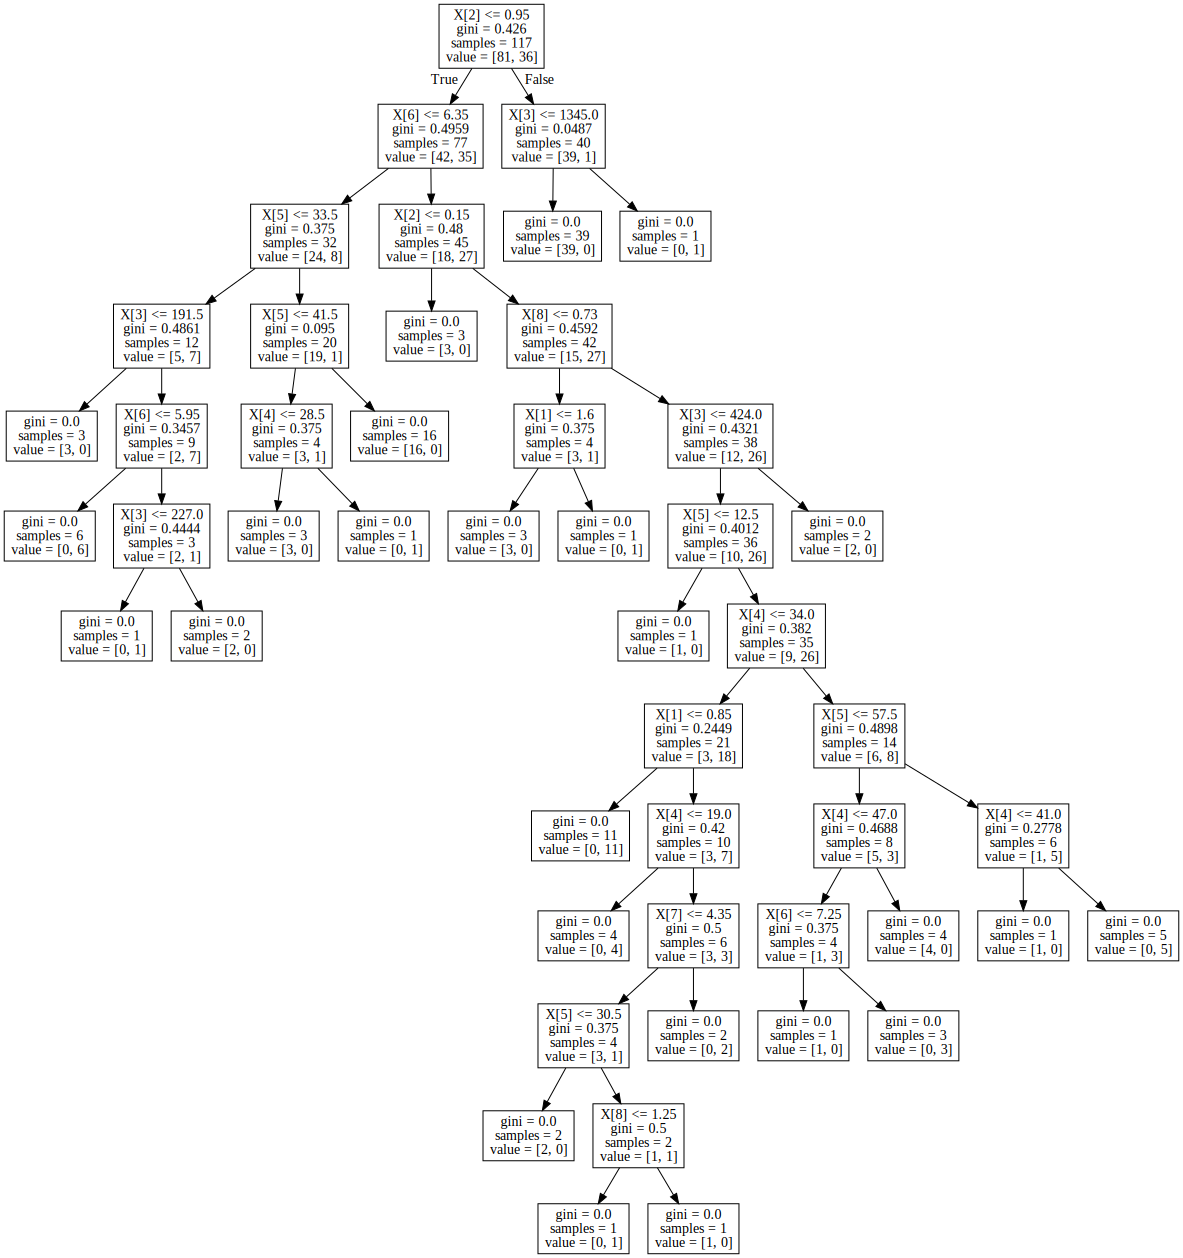

In [29]:
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ipld.gv")
graph

In [117]:
len(train_data) == len(train_data_label)

True